# Ford GoBike Data Exploration

## by Oyelayo Seye

## Introduction
> In this first part, I conduct an exploratory data analysis on the Ford GoBike dataset. The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Using Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns, and relationships

> I will ensure the analysis in the first part is structured, going from simple univariate relationships to multivariate relationships. This part of the project will give me the opportunity to ask questions about the data and make discoveries. 
 
> In the following second part of the project, I will produce a short presentation that illustrates interesting properties, trends, and relationships that I discovered in the selected (cleaned) dataset

## Preliminary Wrangling


# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_ford = pd.read_csv('fordgobike.csv')
df_ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Define 
- changing the start_time and end_time columns to date time data type
- changing the bike_share_for_all_trip column to boolen data type
- changing the start_station_id, end_station_id, bike_id columns to object data type

#### Code

In [4]:
#changing the start_time and end_time columns to date time data type
df_ford.start_time = pd.to_datetime(df_ford.start_time)
df_ford.end_time = pd.to_datetime(df_ford.end_time)

In [5]:
#changing the bike_share_for_all_trip column to boolen data type
df_ford.bike_share_for_all_trip = df_ford.bike_share_for_all_trip.astype('bool')


In [6]:
# changing the start_station_id, end_station_id, bike_id columns to object data type
df_ford.start_station_id = df_ford.start_station_id.astype('str')
df_ford.end_station_id = df_ford.end_station_id.astype('str')
df_ford.bike_id = df_ford.bike_id.astype('str')

#### Test

In [7]:
df_ford.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip              bool
dtype: object

In [8]:
df_ford.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [9]:
df_ford.shape

(183412, 16)

In [10]:
df_ford.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [11]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### What is the structure of your dataset?

-  we have 183412 rows and 16 columns, the columns include <b>('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip')</b>.  

- we have 7 object data type, 1 integer data type, 5 float, 2 datetime data type, 1 boolen data type

### What is/are the main feature(s) of interest in your dataset?

> I am interested in figuring out how trip duration is dependent on other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start time and end time will likely have a significant impact on how long the trip takes. more congested areas should receive more rides. I also think that gender, user type, and year of birth ought to have an impact on journey length.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [12]:
bin_edges = np.arange(0, df_ford.duration_sec.max()+500, 500)

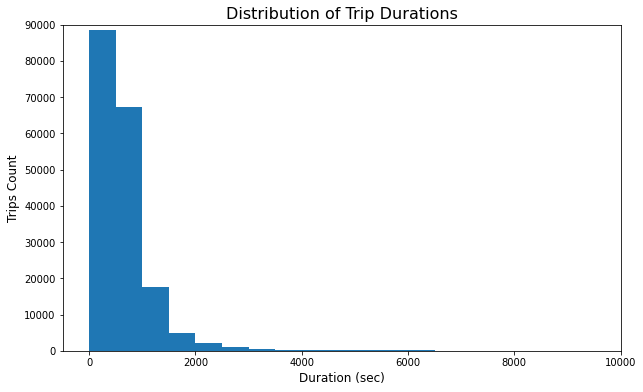

In [13]:
plt.figure(figsize=[10, 6])
plt.hist(data = df_ford, x ='duration_sec', bins = bin_edges);
plt.title('Distribution of Trip Durations', fontsize = 16)
plt.xlabel('Duration (sec)', fontsize = 12)
plt.ylabel('Trips Count', fontsize = 12)
# Setting the x-axis to -500 - 100,000
# and y-axis to 0-90000
plt.axis([-500, 10000, 0, 90000]);

The data is highly skewed: lots of points with low values, with a very long tail of data points with large values. lets apply a logarithmic transform to the data

In [14]:
np.log10(df_ford.duration_sec.describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

(0.0, 15000.0)

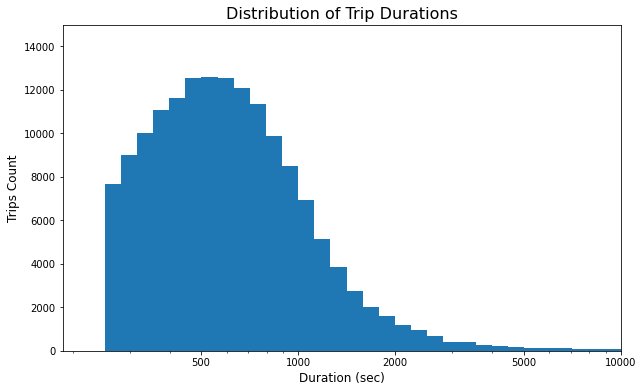

In [15]:
bins = 10**np.arange(2.4, 5+0.05, 0.05)
plt.figure(figsize=[10, 6])
plt.hist(data = df_ford, x ='duration_sec', bins = bins);
ticks = [500, 1000, 2000, 5000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.title('Distribution of Trip Durations', fontsize = 16)
plt.xlabel('Duration (sec)', fontsize = 12)
plt.ylabel('Trips Count', fontsize = 12)
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlim(0, 10000)
plt.ylim(0, 15000)

- Trip distribution is concentrated at the lower level, most of the values fall below 2000 secs. The peak is around 600 secs. 
- Trip distribution values first increase at around 8000 values ( from 0 sec to 200sec on duration axis) to around 12,500 values (600 secs) then start to decline below 2000 values under 2000 secs 


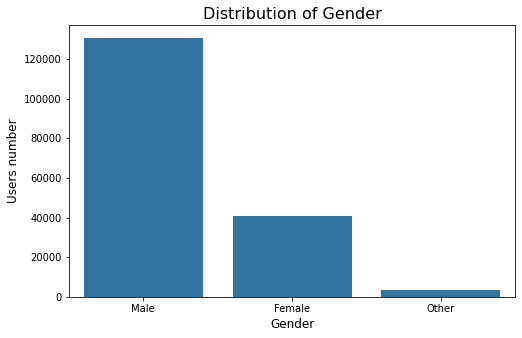

In [16]:
def bar(data, x, title, xlabel, ylabel):
    plt.figure(figsize = [8,5])
    color = sb.color_palette()[0]
    order_base = df_ford[x].value_counts().index
    sb.countplot(data = data, x = x, color = color, order = order_base);
    plt.title(title, fontsize = 16)
    plt.xlabel(xlabel, fontsize = 12);
    plt.ylabel(ylabel, fontsize = 12);

bar(df_ford, 'member_gender', 'Distribution of Gender', 'Gender', 'Users number')

The male has 130651 users, while the female has 40844 users and other are 3652. This shows that the male has the highest number of users

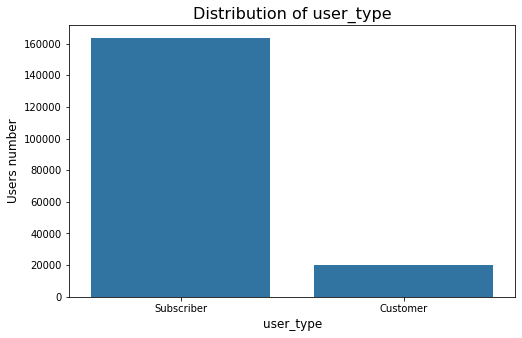

In [17]:
bar(df_ford, 'user_type', 'Distribution of user_type', 'user_type', 'Users number')

The subscriber has 163544 users, while the customer has 19868 users. The subscriber is about 8 times of the customer

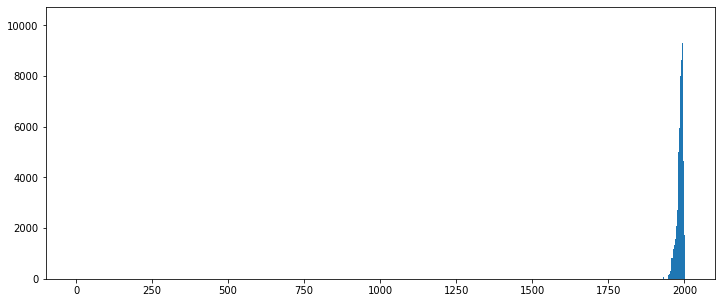

In [18]:
bin = np.arange(0, df_ford.member_birth_year.max()+1, 1)
plt.figure(figsize=[12, 5])
plt.hist(data = df_ford.dropna(), x = 'member_birth_year', bins = bin);

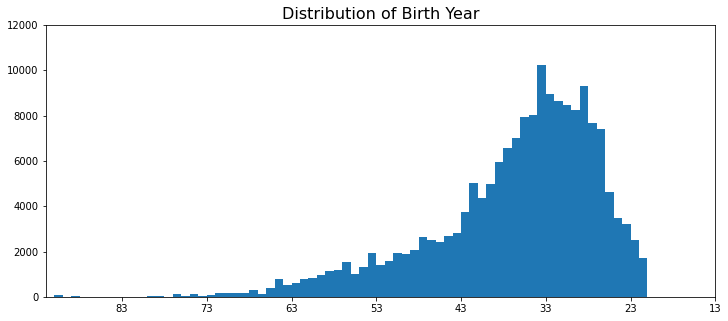

In [19]:
plt.figure(figsize=[12, 5])
plt.hist(data = df_ford.dropna(), x = 'member_birth_year', bins = bin);
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], 
            [(2022-1939), (2022-1949), (2022-1959), (2022-1969), (2022-1979), (2022-1989), (2022-1999), (2022-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of Birth Year', fontsize = 16)
plt.xlim(1930, 2009);
plt.ylim(0, 12000);

The distribution is more concentrated around 20 to 40

### Define
extract start date, hours of the day, day, year and month from start time

### Code

In [20]:
df_ford['start_date'] = df_ford.start_time.dt.strftime('%Y-%m-%d')
df_ford['start_hour'] = df_ford.start_time.dt.strftime('%H')
df_ford['start_day'] = df_ford.start_time.dt.strftime('%A')
df_ford['start_month'] = df_ford.start_time.dt.strftime('%B')

### Test

In [21]:
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour,start_day,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,True,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,True,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,True,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,True,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,2019-02-28,23,Thursday,February


### Define
extract start date, hours of the day, day, year and month from end time

### Code

In [22]:
df_ford['end_date'] = df_ford.end_time.dt.strftime('%Y-%m-%d')
df_ford['end_hour'] = df_ford.end_time.dt.strftime('%H')
df_ford['end_day'] = df_ford.end_time.dt.strftime('%A')
df_ford['end_month'] = df_ford.end_time.dt.strftime('%B')

### Test

In [23]:
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,True,2019-02-28,17,Thursday,February,2019-03-01,08,Friday,March
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,True,2019-02-28,18,Thursday,February,2019-03-01,06,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,True,2019-02-28,12,Thursday,February,2019-03-01,05,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,True,2019-02-28,17,Thursday,February,2019-03-01,04,Friday,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,True,2019-02-28,23,Thursday,February,2019-03-01,00,Friday,March


In [24]:
df_ford_clean = df_ford.to_csv('df_ford_clean', index = False)

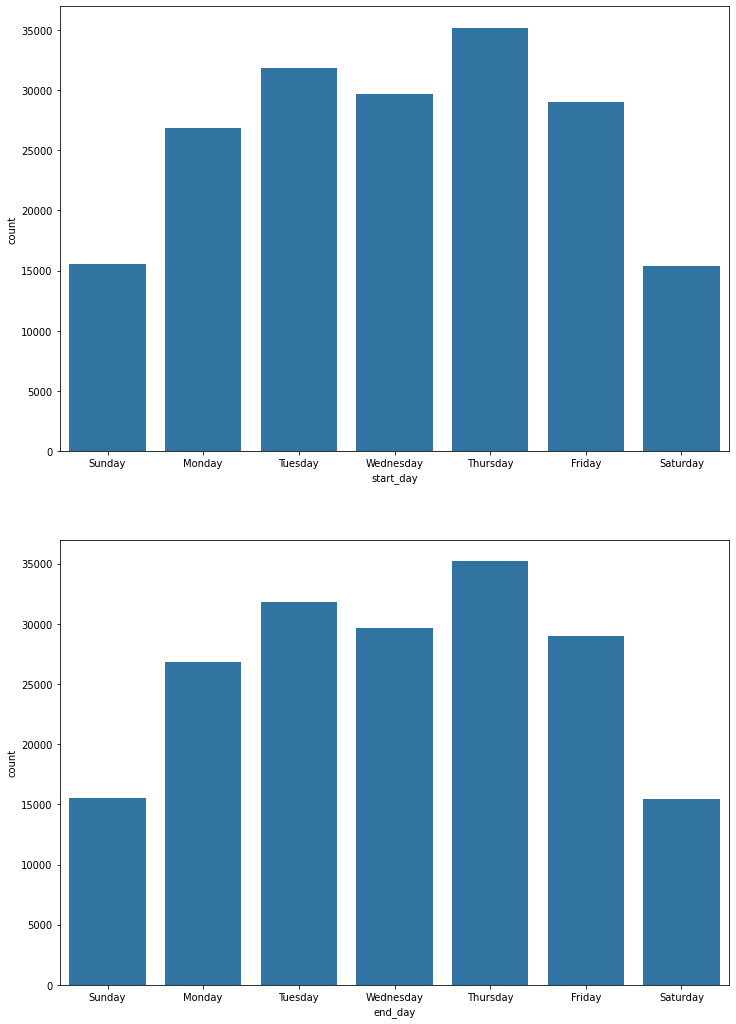

In [25]:
plt.figure(figsize = [12,18])
plt.subplot(2,1,1)
color_base = sb.color_palette()[0]
order_base = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
order = df_ford.start_day.value_counts().index
sb.countplot(data = df_ford, x = 'start_day', color = color_base, order = order_base);

plt.subplot(2,1,2)
color_base = sb.color_palette()[0]
order_base = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.countplot(data = df_ford, x = 'end_day', color = color_base, order = order_base);

Thursday is the most day used for bike, follow by tuesday.

In [26]:
df_ford['start_hour'].unique()

array(['17', '18', '12', '23', '22', '21', '20', '19', '15', '10', '16',
       '09', '11', '00', '13', '14', '08', '07', '05', '06', '04', '03',
       '02', '01'], dtype=object)

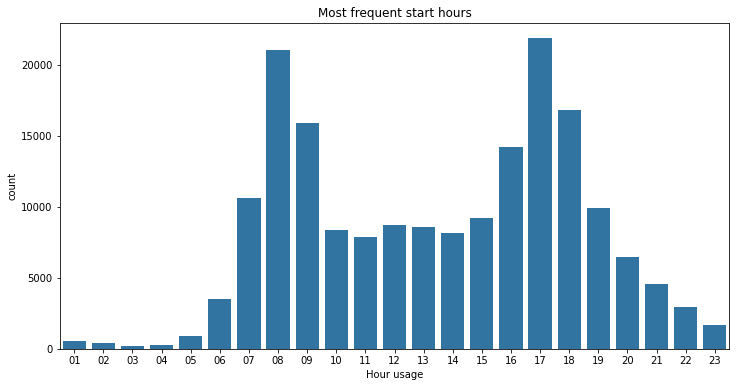

In [27]:
order_hours = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'];
hours = pd.api.types.CategoricalDtype(ordered=True, categories=order_hours)
df_ford['start_hour'] = df_ford['start_hour'].astype(hours)
plt.figure(figsize = [12, 6])
sb.countplot(data=df_ford ,x='start_hour', color = color_base);
plt.xlabel('Hour usage')
plt.title('Most frequent start hours');


The most frequent start hours is 8 am in the morning and 5pm in the evening

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Trip distribution is concentrated at the lower level, most of the values fall below 2000 secs. The peak is around 600 secs. 
- Trip distribution values first increase at around 8000 values ( from 0 sec to 200sec on duration axis) to around 12,500 values (600 secs) then start to decline below 2000 values under 2000 secs 
- There is an unusual relationship in trip duration where we have a lot of low point values. I made use of log transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
From 0 to 1750 in bith year distribution, there is no data found in this area. xlim is used to rescale the axis so we can take a close look at the data distribution.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

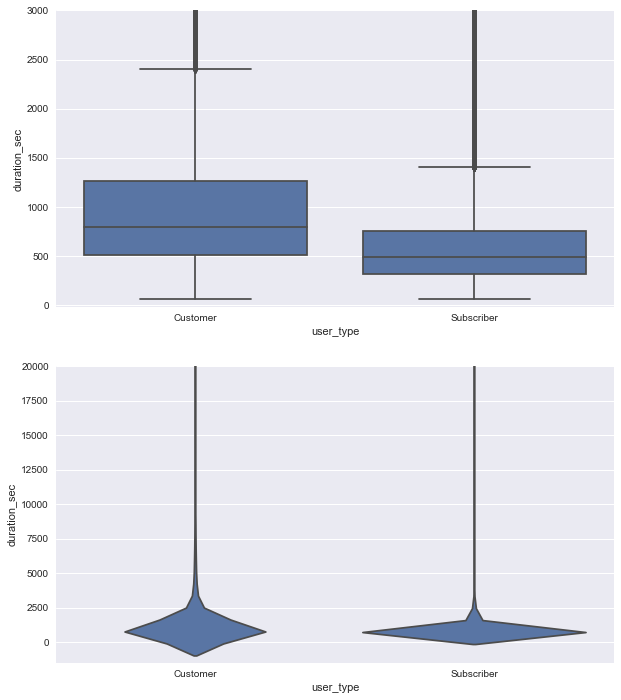

In [49]:
plt.figure(figsize = [10,12])
plt.subplot(2,1,1)
color_base = sb.color_palette()[0]
sb.boxplot(data = df_ford, x = 'user_type', y = 'duration_sec', color = color_base)
plt.ylim(-20,3000);

plt.subplot(2,1,2)
color_base = sb.color_palette()[0]
sb.violinplot(data = df_ford, x = 'user_type', y = 'duration_sec', inner = None, color = color_base);
plt.ylim(-1500,20000);

The above visualization depicts that the customer has more duration secs than the subscriber. hence, The subscriber has more outliers than the customer. The distribution of the two user types are below 2500 duration secs

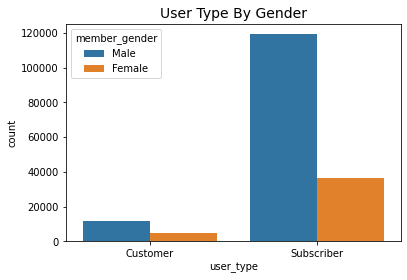

In [29]:
df_ford_sub = df_ford.loc[df_ford['member_gender'].isin(['Male', 'Female'])]
sb.countplot(data = df_ford_sub, x = 'user_type', hue = 'member_gender' );
plt.title('User Type By Gender', fontsize = 14);

The male subscribers are more than the female subscribers and the male customers are more than female customers

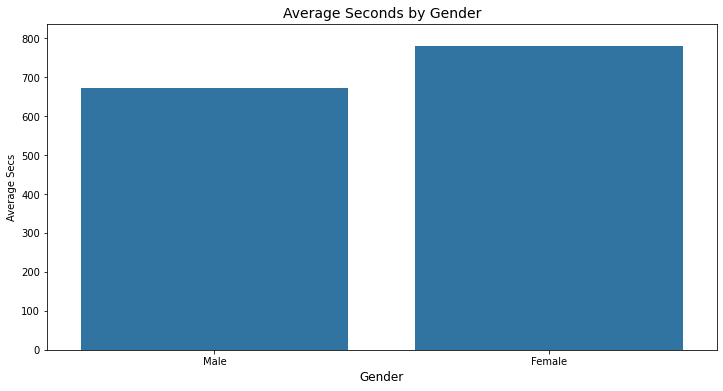

In [30]:
plt.figure(figsize = [12,6])
color_base = sb.color_palette()[0]
sb.barplot(data = df_ford_sub, x = 'member_gender', y = 'duration_sec', color = color_base, errwidth = 0 );
plt.title('Average Seconds by Gender', fontsize = 14)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Average Secs');

The average seconds used by the male was around 700, while the average seconds used by the female was around 800. Therefore, we could say the female used more seconds than the male.

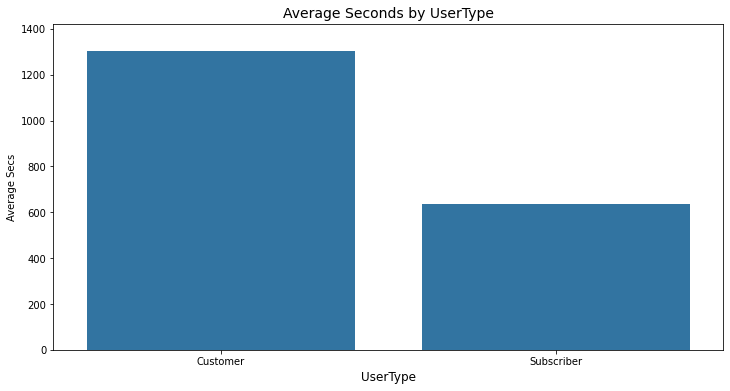

In [31]:
plt.figure(figsize = [12,6])
color_base = sb.color_palette()[0]
sb.barplot(data = df_ford_sub, x = 'user_type', y = 'duration_sec', color = color_base, errwidth = 0);
plt.title('Average Seconds by UserType', fontsize = 14)
plt.xlabel('UserType', fontsize = 12)
plt.ylabel('Average Secs');

The average seconds used by the Customer was around 1400, while the average seconds used by the Subscriber was around 600. Therefore, we could say the Customer used more seconds than the subscriber.

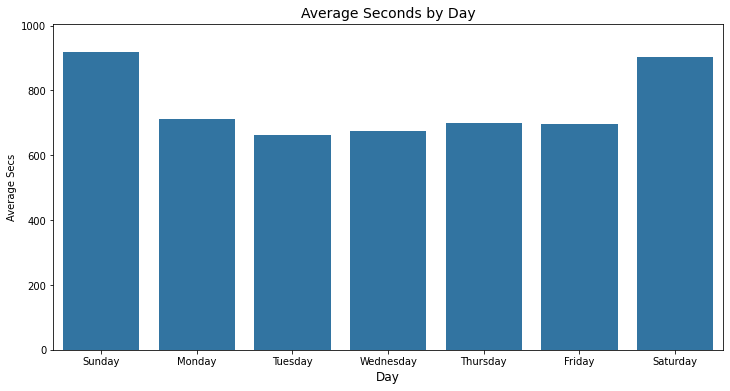

In [32]:
plt.figure(figsize = [12,6])
color_base = sb.color_palette()[0]
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
D_order =  pd.api.types.CategoricalDtype(ordered=True, categories = day_order)
df_ford['start_day'] = df_ford['start_day'].astype(D_order)
sb.barplot(data = df_ford, x = 'start_day', y = 'duration_sec', color = color_base, errwidth = 0);
plt.title('Average Seconds by Day', fontsize = 14)
plt.xlabel('Day', fontsize = 12)
plt.ylabel('Average Secs');

Sunday and Saturday have the highest average secs, which are above 800, while Monday is the second day with the highest average secs, which are above 600, followed by Friday and Thursday, which are roughly equal in length and also fall into the above 600 range. Tuesday has the fewest average seconds.

Text(0, 0.5, 'Avg. duration_sec')

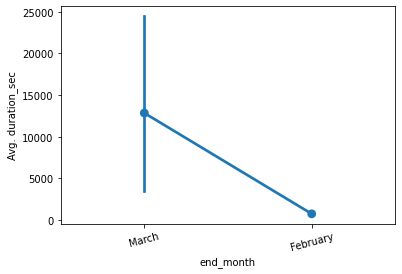

In [33]:
sb.pointplot(data=df_ford, x='end_month', y='duration_sec',  color=color_base)
plt.xticks(rotation=15);
plt.ylabel('Avg. duration_sec')

In [34]:
df_ford.groupby('end_month')['duration_sec'].mean()

end_month
February      725.021434
March       12841.687500
Name: duration_sec, dtype: float64

The above visualization shows that there is more in March duration seconds than in February as far as the mean is concerned. The average duration per second for February is 725 while that of March is 12841.  

Text(0.5, 0, 'Duration(sec)')

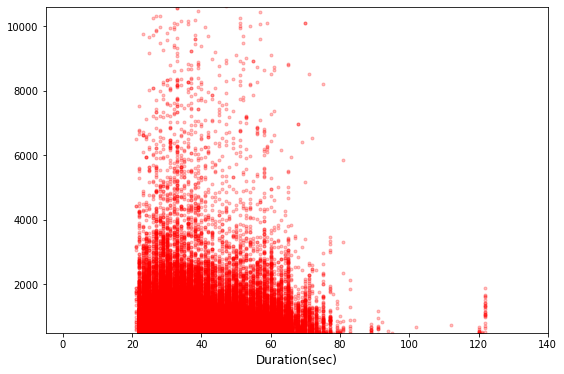

In [35]:
plt.figure(figsize =[9,6])
plt.scatter(x= (2022-df_ford['member_birth_year']), y = df_ford['duration_sec'], alpha = 0.25, marker = '.', color = 'r')
plt.xlim(-5,140);
plt.ylim(500,10600);
plt.xlabel('Age', fontsize = 12)
plt.xlabel('Duration(sec)', fontsize = 12)

- Most of the durations are below 6000secs, concentrated around 2000 secs
- Age is below 80 years with high concentrated around 20 to 45

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- The customer has more duration seconds than the subscriber. Hence, the subscriber has more outliers than the customer. 
- The average number of seconds used by the male was around 700, while the average number of seconds used by the female was around 800. Therefore, we could say the female used more seconds than the male. 
- The average number of seconds used by the customer was around 1400, while the average number of seconds used by the subscriber was around 600. Therefore, we could say the customer used more seconds than the subscriber. 
- Sunday and Saturday have the highest average secs, which are above 800, while Monday is the second day with the highest average secs, which are above 600
- As far as the mean is concerned, there is more in March duration seconds than in February. The average duration per second for February is 725, while that of March is 12841.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The male subscribers are more than the female subscribers and the male customers are more than female customers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

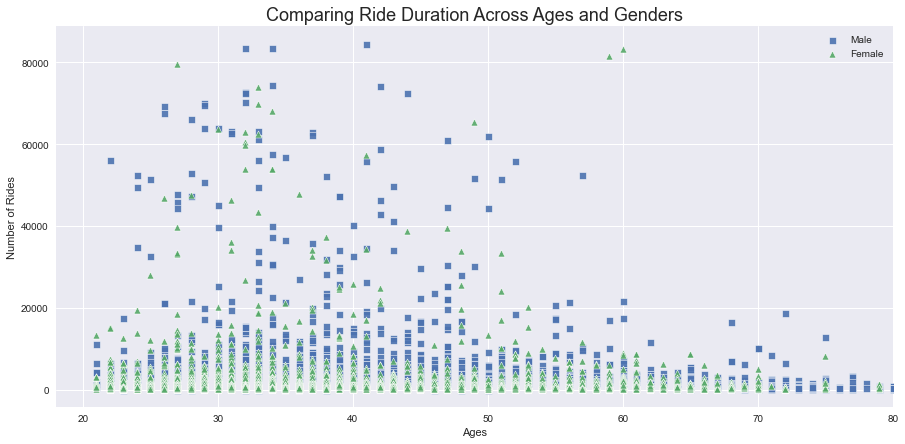

In [36]:
#Visualizing the data in an adapted scatterplot with a sample size of 250000 records
plt.figure(figsize = (15,7))
plt.style.use('seaborn')
gender_markers = [['Male', 's'],
               ['Female', '^'],]

for gender, marker in gender_markers:
    df_gender = df_ford[df_ford['member_gender'] == gender]
    sb.scatterplot(data = df_gender, x = 2022 - df_gender['member_birth_year'], y = 'duration_sec', marker = marker, alpha = .9);
plt.legend(['Male', 'Female', 'Other']);
plt.xlim(18, 80);
plt.title('Comparing Ride Duration Across Ages and Genders', fontsize = 18);
plt.xlabel('Ages');
plt.ylabel('Number of Rides');


- There is no strong indication that one gender ride more than the other as the bothe gender can be seen around the same level. 

- There is an unsurprising long tail when it comes to age

In [37]:
order_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
def graph_user(n,xvar, yvar, cvar, graph):
    if  graph == 'line':
        plt.figure(figsize=(14,6))
        graph = sb.pointplot(x=xvar, y=yvar, hue=cvar, data=n,linestyles='dashed', order=order_day)     
    else:
        plt.figure(figsize=(14,6))
        graph = sb.stripplot(x=xvar, y=yvar,hue=cvar,data=n, order=day_order, jitter=0.35,dodge=True)
         
    plt.title('The trip duration of each user in terms of weekdays')
    

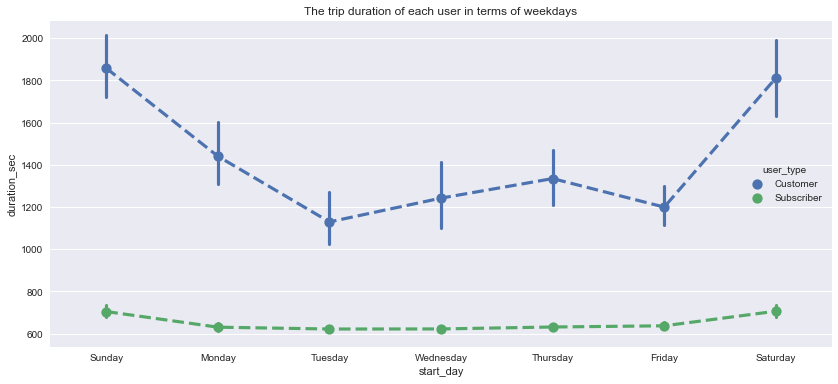

In [38]:
graph_user(df_ford, 'start_day', 'duration_sec', 'user_type', 'line')

- There is a relationship between customer days and subscriber days as the highest trip days fall on Sunday and Saturday. However, the customer has the highest duration secounds than the subscriber.

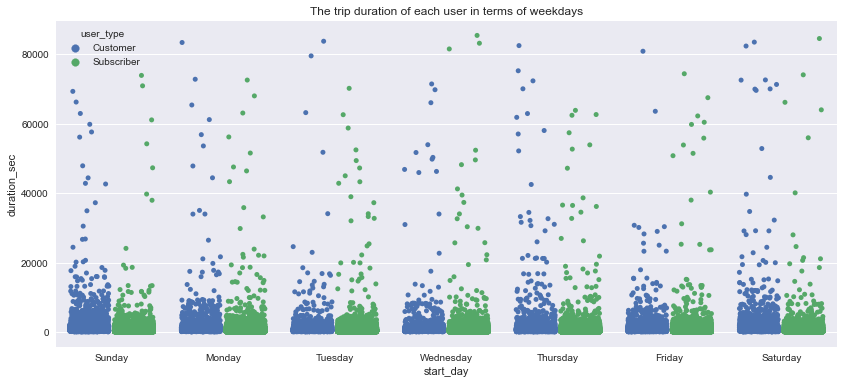

In [39]:
graph_user(df_ford, 'start_day', 'duration_sec', 'user_type', 'point')

- The customer is more dense on Sunday, Monday, Thursday, and Saturday than the subscriber, while the subscriber is denser than the customer on Tuesday, Wednesday, and Friday.


- On Monday, Tuesday, Thursday, and Friday, the customer has more duration seconds than the subscriber, while the subscriber has more duration seconds on Sunday, Wednesday and both are nearly equal on Saturday.

In [40]:
np.random.seed(2018)
sample = np.random.choice(df_ford.shape[0], 200, replace = False)
df_ford_subset = df_ford.loc[sample]
df_ford_subset['age'] = 2022 - df_gender['member_birth_year']

<Figure size 864x432 with 0 Axes>

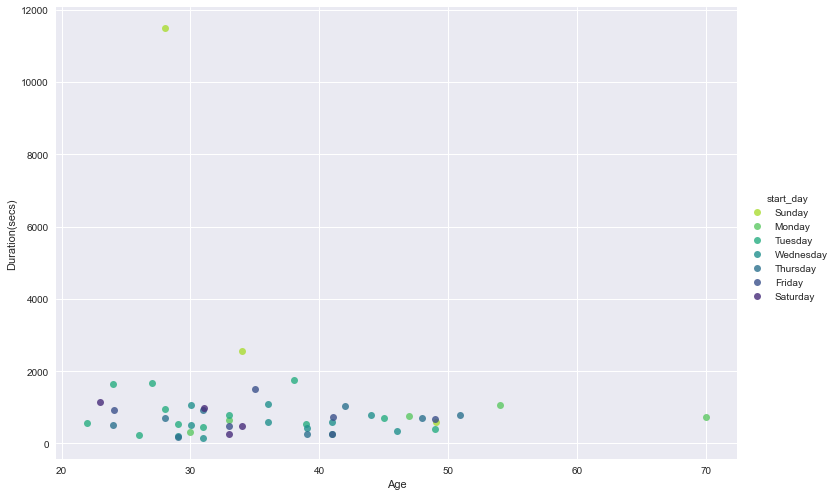

In [41]:
plt.figure(figsize = [12,6])
day_ordered = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'];
day = pd.api.types.CategoricalDtype(ordered=True, categories=day_ordered)
df_ford['start_day'] = df_ford['start_day'].astype(day)
g = sb.FacetGrid(data = df_ford_subset, hue = 'start_day', size = 7, height = 6, aspect = 1.5, palette = 'viridis_r')
g.map(sb.regplot,  'age', 'duration_sec', x_jitter = .04, fit_reg = False);
plt.xlabel('Age');
plt.ylabel('Duration(secs)');
g.add_legend()


- sunday has the highest duration seconds first observe at above 2000 and the highest around 12,000.
- The data is more concentrated around the age 20 to 40
- The trip duration is concentrated below 2000


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- There is no strong indication that one gender ride more than the other as the bothe gender can be seen around the same level. 

- There is an unsurprising long tail when it comes to age


### Were there any interesting or surprising interactions between features?

- There is a relationship between customer days and subscriber days as the highest trip days fall on Sunday and Saturday.


## Conclusions
- Trip distribution is concentrated at the lower level, most of the values fall below 2000 secs.
- Most of the  age of the users is between 20 and 40
- Thursday and Tuesday has the most usage of the bikes
- most frequent usage hours are 8 o'clock in the monrning and 5 evening which relates to the regular working hours to most people
- The customers use the bikes for longer periods than subscribers even though the subscribers are much higher in terms of numbers having the sunday and saturday the most usage days which are the weekends



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

